## Data Source
For this project, we are working with four datasets, each providing a unique perspective on energy and emissions data. 
1. CO2 Emissions dataset: https://www.eia.gov/opendata/browser/co2-emissions/co2-emissions-aggregates?frequency=annual&data=value;&sortColumn=period;&sortDirection=desc;
2. Retail Electric Sales Data: https://www.eia.gov/opendata/browser/electricity/retail-sales
3. Electric Power Operational Data: https://www.eia.gov/opendata/browser/electricity/electric-power-operational-data
4. Emissions by State by Fuel: https://www.eia.gov/opendata/browser/electricity/state-electricity-profiles/emissions-by-state-by-fuel

This section focuses on the **Retail Electric Sales Data**.
This dataset tracks electricity sales across states and sectors, detailing customer counts, electricity prices (in cents per kilowatt-hour), revenues (in million dollars), and total electricity consumption (in million kilowatt-hours).

## Retail Electric Sales Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import requests

### Fetche electricity retail sales data from the U.S. Energy Information Administration (EIA) API

API URL: https://api.eia.gov/v2/electricity/retail-sales/data/ <br>
Parameters: Specify the API key, data fields (customers, price, revenue, sales), date range, sorting preferences, and pagination details.

In [2]:
# EIA API URL for electricity retail sales data
url = "https://api.eia.gov/v2/electricity/retail-sales/data/"

# Define the parameters for the GET request
api_key = "XojRFl5fFmQtNSBz5fXtmihxKJsuC2yrEQOmq9x0"
params = {
    "api_key": api_key,
    "frequency": "monthly",
    "data[0]": "customers",
    "data[1]": "price",
    "data[2]": "revenue", # total revenue
    "data[3]": "sales",
    "start": "2014-01",
    "end": "2024-06",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

all_data = []  # To store all the retrieved data
total_rows = 0  # To keep track of the total number of rows received

while True:
    # Send a GET request to the EIA API with parameters
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()

        # Check if the 'data' key exists in the response
        if 'data' in data['response']:
            all_data.extend(data['response']['data'])  # Collect data from this response
            total_rows += len(data['response']['data'])  # Update the total count

            # Check if the response contains fewer than the requested rows, indicating no more data
            if len(data['response']['data']) < params['length']:
                break  # Exit loop if no more data

            # Update the offset for the next request
            params['offset'] += params['length']
        else:
            print("No data found in the response.")
            break  # Exit loop if no data is found
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}, Response: {response.text}")
        break  # Exit loop on failure

# Output the total number of rows received
print(f"Total rows received: {total_rows}")

Total rows received: 46872


### Description of the data columns
**period:**  The reporting year and month of the data, formatted as YYYY-MM. For example, "2024-06" indicates June 2024. <br>
**sectorId:** The two-letter postal abbreviation for the U.S. state. For example, "MA" stands for Massachusetts. <br>
**stateDescription:** The full name of the state corresponding to the stateId. For example, "Massachusetts". <br>
**sectorId:** A unique identifier for the sector of energy consumption. For example, "IND" represents the Industrial sector. <br>
**sectorName:** The full name or description of the sector corresponding to the sectorId. For example, "industrial". <br>
**customers:** The number of electricity customers in the specified sector and state during the given period. For example, "9850". <br>
**price:** The average price of electricity for the specified sector and state during the given period, measured in cents per kilowatt-hour. For example, "18.05". <br>
**revenue:** The total revenue from electricity sales to the specified sector and state during the given period, measured in million dollars. For example, "87.30182". <br>
**sales:** The total electricity consumption for the specified sector and state during the given period, measured in million kilowatt-hours. For example, "483.74038". <br>
**customers-units:** The unit of measurement for the customers column. For example, "number of customers". <br>
**price-units:** The unit of measurement for the price column. For example, "cents per kilowatt-hour". <br>
**revenue-units:** The unit of measurement for the revenue column. For example, "million dollars". <br>
**sales-units:** The unit of measurement for the sales column. For example, "million kilowatt-hours". <br>

In [3]:
#display first 5 rows in dataset
electricity_df = pd.DataFrame(all_data)
electricity_df.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2024-06,MA,Massachusetts,IND,industrial,9850,18.05,87.30182,483.74038,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
1,2024-06,WI,Wisconsin,ALL,all sectors,3222461,13.06,771.66424,5906.9894,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
2,2024-06,WV,West Virginia,TRA,transportation,0,0,0,0,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
3,2024-06,WV,West Virginia,RES,residential,864734,15.48,128.2723,828.48311,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
4,2024-06,WV,West Virginia,OTH,other,None,None,None,None,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [4]:
electricity_df.describe()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
count,46872,46872,46872,46872,46872,39058,39058,39058,39058,46872,46872,46872,46872
unique,126,62,62,6,6,29185,2669,35211,35323,1,1,1,1
top,2024-06,CA,California,IND,industrial,0,0,0,0,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
freq,372,779,779,7815,7815,3018,3026,3024,3021,46872,46872,46872,46872


### Data Preprocessing

#### Check and Convert data types

In [5]:
electricity_df.dtypes

period              object
stateid             object
stateDescription    object
sectorid            object
sectorName          object
customers           object
price               object
revenue             object
sales               object
customers-units     object
price-units         object
revenue-units       object
sales-units         object
dtype: object

In [6]:
# List of columns to convert to numeric
columns_to_convert = ['customers', 'price', 'revenue', 'sales']

# Convert specified columns to numeric types, coercing errors to handle invalid entries
for column in columns_to_convert:
    electricity_df[column] = pd.to_numeric(electricity_df[column], errors='coerce')

print(electricity_df.dtypes)

period               object
stateid              object
stateDescription     object
sectorid             object
sectorName           object
customers           float64
price               float64
revenue             float64
sales               float64
customers-units      object
price-units          object
revenue-units        object
sales-units          object
dtype: object


#### Round the numerical values to 2 decimal places

In [7]:
electricity_df = round(electricity_df,2)

In [8]:
electricity_df.describe()

,customers,price,revenue,sales
count,3.905800e+04,39058.000000,39058.000000,39058.000000
mean,3.005825e+06,10.559531,678.058071,6134.561520
std,1.238123e+07,5.609273,2468.020713,21856.882278
min,0.000000e+00,0.000000,0.000000,0.000000
25%,5.451250e+03,7.842500,35.570000,274.950000
50%,3.092285e+05,10.030000,143.385000,1479.160000
75%,2.067822e+06,12.610000,493.700000,4411.367500
max,1.631412e+08,45.590000,52361.450000,392436.030000


#### Handle missing values

In [9]:
missing_values = electricity_df.isnull().sum()
missing_value_rate = (missing_values / len(electricity_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Rate (%)': missing_value_rate
})

print(missing_summary)

                  Missing Values  Missing Rate (%)
period                         0          0.000000
stateid                        0          0.000000
stateDescription               0          0.000000
sectorid                       0          0.000000
sectorName                     0          0.000000
customers                   7814         16.670934
price                       7814         16.670934
revenue                     7814         16.670934
sales                       7814         16.670934
customers-units                0          0.000000
price-units                    0          0.000000
revenue-units                  0          0.000000
sales-units                    0          0.000000


In [10]:
# Filter rows with missing values
missing_rows = electricity_df[electricity_df.isnull().any(axis=1)]

# Sample 10 records from rows with missing values
sample_missing = missing_rows.sample(n=10, random_state=42)
sample_missing

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
15446,2021-01,MS,Mississippi,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
32267,2017-04,MI,Michigan,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
15417,2021-01,RI,Rhode Island,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
40846,2015-05,US,U.S. Total,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
28099,2018-03,CT,Connecticut,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
28958,2018-01,DE,Delaware,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
23617,2019-03,DC,District of Columbia,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
6275,2023-02,AR,Arkansas,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
41930,2015-02,IN,Indiana,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
40961,2015-04,NJ,New Jersey,OTH,other,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


#### The missing values all belong to the "other" sector, which lacks key data like customers, price, and sales. Dropping these rows

In [11]:
electricity_df = electricity_df[electricity_df['sectorName'] != 'other']

In [12]:
missing_values = electricity_df.isnull().sum()
missing_value_rate = (missing_values / len(electricity_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Rate (%)': missing_value_rate
})
print(missing_summary)

                  Missing Values  Missing Rate (%)
period                         0               0.0
stateid                        0               0.0
stateDescription               0               0.0
sectorid                       0               0.0
sectorName                     0               0.0
customers                      0               0.0
price                          0               0.0
revenue                        0               0.0
sales                          0               0.0
customers-units                0               0.0
price-units                    0               0.0
revenue-units                  0               0.0
sales-units                    0               0.0


In [13]:
electricity_df['period'].unique()

array(['2024-06', '2024-05', '2024-04', '2024-03', '2024-02', '2024-01',
       '2023-12', '2023-11', '2023-10', '2023-09', '2023-08', '2023-07',
       '2023-06', '2023-05', '2023-04', '2023-03', '2023-02', '2023-01',
       '2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07',
       '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01',
       '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07',
       '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01',
       '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07',
       '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01',
       '2019-12', '2019-11', '2019-10', '2019-09', '2019-08', '2019-07',
       '2019-06', '2019-05', '2019-04', '2019-03', '2019-02', '2019-01',
       '2018-12', '2018-11', '2018-10', '2018-09', '2018-08', '2018-07',
       '2018-06', '2018-05', '2018-04', '2018-03', '2018-02', '2018-01',
       '2017-12', '2017-11', '2017-10', '2017-09', 

In [14]:
electricity_df['stateDescription'].unique()

array(['Massachusetts', 'Wisconsin', 'West Virginia', 'Washington',
       'Virginia', 'Vermont', 'Utah', 'Texas', 'Tennessee',
       'South Dakota', 'South Carolina', 'Rhode Island', 'Pennsylvania',
       'Oregon', 'Oklahoma', 'Maryland', 'Maine', 'U.S. Total',
       'Pacific Noncontiguous', 'Pacific Contiguous', 'Mountain',
       'West South Central', 'East South Central', 'South Atlantic',
       'West North Central', 'East North Central', 'Middle Atlantic',
       'New England', 'Wyoming', 'Alabama', 'Louisiana', 'Kentucky',
       'Kansas', 'Iowa', 'Indiana', 'Illinois', 'Idaho', 'Hawaii',
       'Georgia', 'Florida', 'District of Columbia', 'Delaware',
       'Connecticut', 'Colorado', 'California', 'Arkansas', 'Arizona',
       'Alaska', 'Ohio', 'North Dakota', 'North Carolina', 'New York',
       'New Mexico', 'New Jersey', 'New Hampshire', 'Nevada', 'Nebraska',
       'Montana', 'Missouri', 'Mississippi', 'Minnesota', 'Michigan'],
      dtype=object)

In [15]:
electricity_df['stateid'].unique()

array(['MA', 'WI', 'WV', 'WA', 'VA', 'VT', 'UT', 'TX', 'TN', 'SD', 'SC',
       'RI', 'PA', 'OR', 'OK', 'MD', 'ME', 'US', 'PACN', 'PACC', 'MTN',
       'WSC', 'ESC', 'SAT', 'WNC', 'ENC', 'MAT', 'NEW', 'WY', 'AL', 'LA',
       'KY', 'KS', 'IA', 'IN', 'IL', 'ID', 'HI', 'GA', 'FL', 'DC', 'DE',
       'CT', 'CO', 'CA', 'AR', 'AZ', 'AK', 'OH', 'ND', 'NC', 'NY', 'NM',
       'NJ', 'NH', 'NV', 'NE', 'MT', 'MO', 'MS', 'MN', 'MI'], dtype=object)

#### Identify the entries in **stateDescription** and **stateid** that are not actual states

In [16]:
# List of valid U.S. states and their abbreviations
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wisconsin', 'Wyoming'
]

valid_state_abbreviations = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 
    'WI', 'WY'
]

# Identify invalid state descriptions
invalid_descriptions = set(electricity_df['stateDescription'].unique()) - set(valid_states)

# Identify invalid state abbreviations
invalid_abbreviations = set(electricity_df['stateid'].unique()) - set(valid_state_abbreviations)

print("Invalid State Descriptions:")
print(invalid_descriptions)

print("\nInvalid State Abbreviations:")
print(invalid_abbreviations)

Invalid State Descriptions:
{'East South Central', 'District of Columbia', 'New England', 'South Atlantic', 'Middle Atlantic', 'West North Central', 'West South Central', 'Mountain', 'East North Central', 'Pacific Contiguous', 'Pacific Noncontiguous', 'U.S. Total'}

Invalid State Abbreviations:
{'SAT', 'MAT', 'NEW', 'ESC', 'DC', 'WNC', 'PACC', 'ENC', 'US', 'MTN', 'PACN', 'WSC'}


### Exploratory Data Analysis

#### Plot 1 - Total Number of Customers by Sector

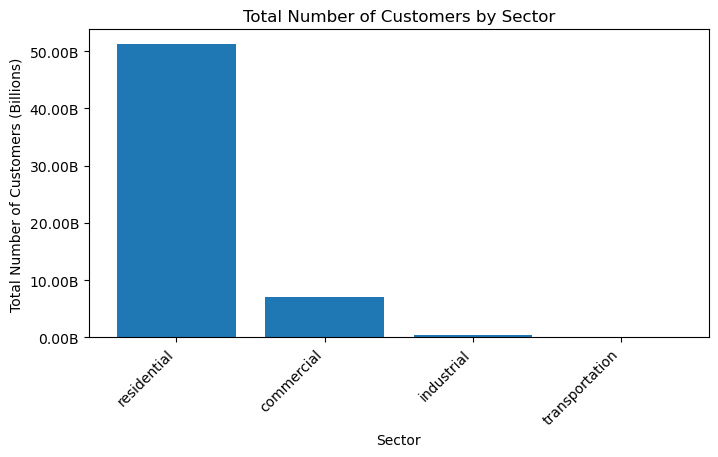

In [17]:
electricity_df['customers'] = pd.to_numeric(electricity_df['customers'], errors='coerce')
electricity_df_cleaned = electricity_df.dropna(subset=['customers'])

# Remove rows where sectorName is 'all sectors' or any other total-like sector
electricity_df_cleaned = electricity_df_cleaned[electricity_df_cleaned['sectorName'].str.lower() != 'all sectors']
# Group by 'sectorName' and sum the 'customers' for each sector
customers_by_sector = electricity_df_cleaned.groupby('sectorName')['customers'].sum().reset_index()
# Convert customers to billions for display purposes
customers_by_sector['customers'] = customers_by_sector['customers'] / 1_000_000_000

customers_by_sector = customers_by_sector.sort_values(by='customers', ascending=False)

# Create a bar chart with default color
plt.figure(figsize=(8, 4))
plt.bar(customers_by_sector['sectorName'], customers_by_sector['customers'])

# Add labels and title, specifying the units
plt.xlabel('Sector')
plt.ylabel('Total Number of Customers (Billions)')
plt.title('Total Number of Customers by Sector')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Format y-axis to show values with "B" (for billions)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}B'))

# Display the plot
plt.show()

#### Plot 2 - Average Electricity Price by State (2014 - 2024)

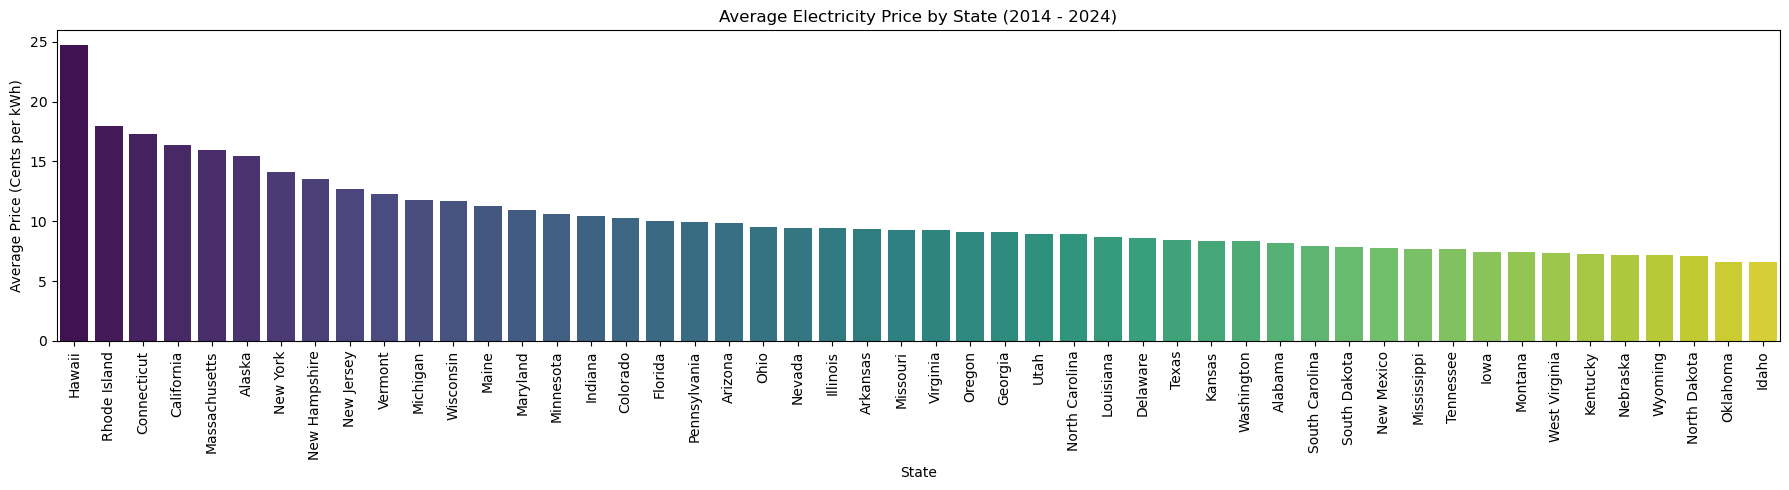

In [18]:
electricity_df['price'] = pd.to_numeric(electricity_df['price'], errors='coerce')

# Drop any rows where 'price' is NaN
electricity_df_cleaned = electricity_df.dropna(subset=['price'])

# List of non-state entries to be removed
non_states = [
    'united states', 'u.s. total', 'district of columbia', 'pacific noncontiguous',
    'pacific contiguous', 'mountain', 'west south central', 'east south central',
    'south atlantic', 'west north central', 'east north central', 
    'middle atlantic', 'new england'
]

# Remove non-state entries
electricity_df_cleaned = electricity_df_cleaned[~electricity_df_cleaned['stateDescription'].str.lower().isin(non_states)]

# Group by 'stateDescription' and calculate the average price for each state
avg_price_by_state = electricity_df_cleaned.groupby('stateDescription')['price'].mean().reset_index()

# Sort the states by average price for better visualization
avg_price_by_state = avg_price_by_state.sort_values(by='price', ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(18, 5))
sns.barplot(x='stateDescription', y='price', data=avg_price_by_state, palette='viridis')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Price (Cents per kWh)')
plt.title('Average Electricity Price by State (2014 - 2024)')
plt.xticks(rotation=90)  # Rotate state labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

#### Plot 3 - Total Revenue Generated by State (2014 - 2024)

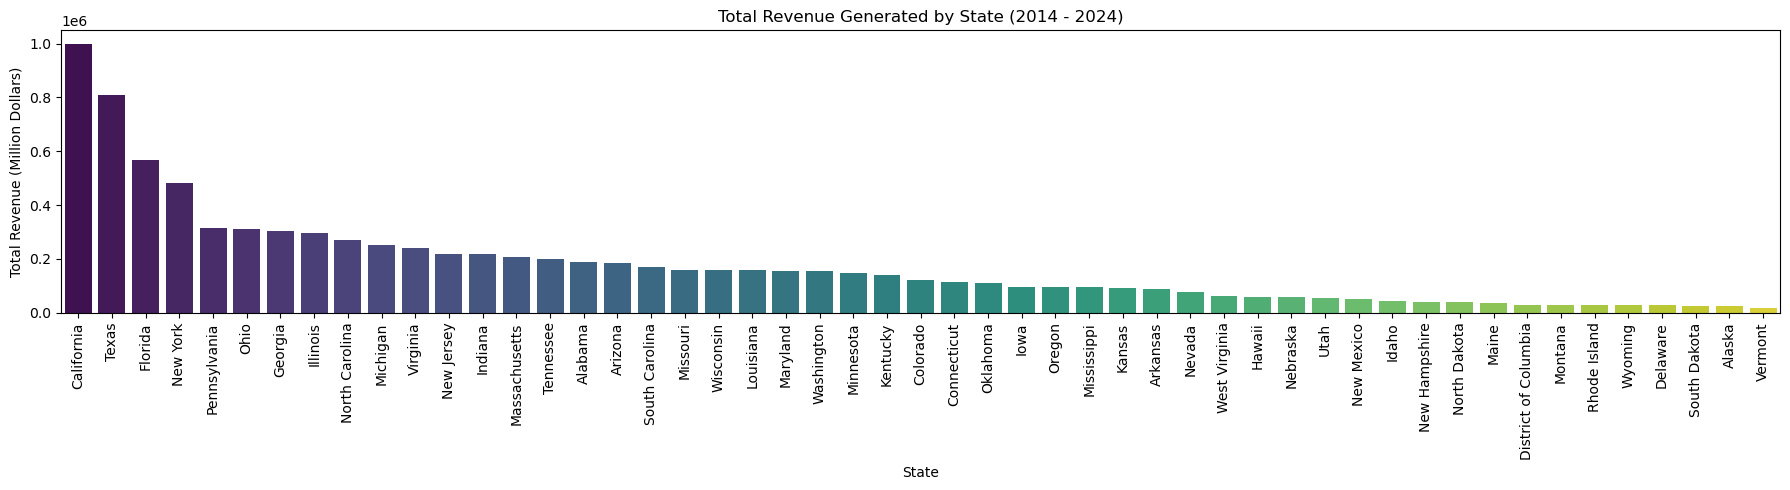

In [19]:
electricity_df['revenue'] = pd.to_numeric(electricity_df['revenue'], errors='coerce')

# Drop any rows where 'revenue' is NaN
electricity_df_cleaned = electricity_df.dropna(subset=['revenue'])

# List of non-state entries to be removed
non_states = [
    'u.s. total', 'pacific noncontiguous', 'pacific contiguous', 'mountain',
    'west south central', 'east south central', 'south atlantic', 
    'west north central', 'east north central', 'middle atlantic', 
    'new england'
]

# Remove non-state entries (make case-insensitive)
electricity_df_cleaned = electricity_df_cleaned[
    ~electricity_df_cleaned['stateDescription'].str.lower().isin(non_states)
]

# Group by 'stateDescription' and calculate the total revenue for each state
revenue_by_state = electricity_df_cleaned.groupby('stateDescription')['revenue'].sum().reset_index()

# Sort states by revenue for better visualization
revenue_by_state = revenue_by_state.sort_values(by='revenue', ascending=False)

# Create a bar chart
plt.figure(figsize=(18, 5))
sns.barplot(x='stateDescription', y='revenue', data=revenue_by_state, palette='viridis')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Revenue (Million Dollars)')
plt.title('Total Revenue Generated by State (2014 - 2024)')
plt.xticks(rotation=90)  # Rotate state labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


#### Plot 4 - Pie Charts of Electricity Distribution by Sector

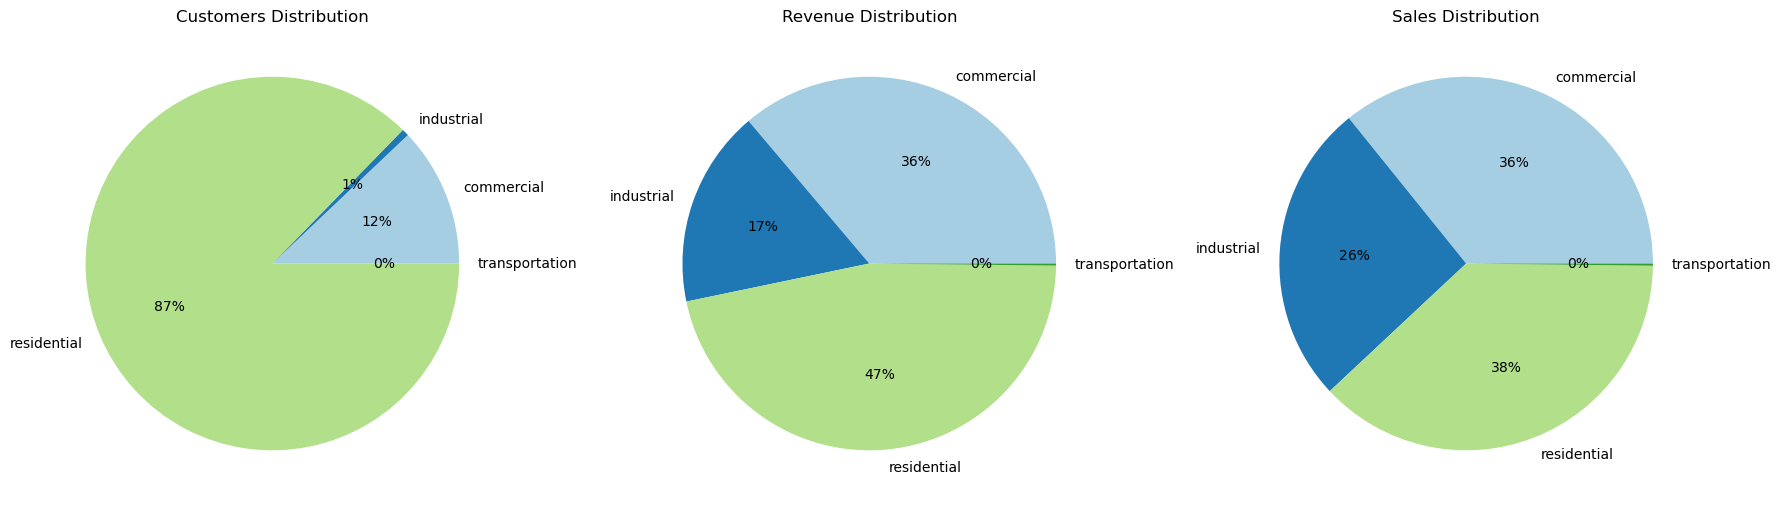

In [20]:
# Prepare the data for creating a pie diagram
pie_diagram_data = electricity_df.loc[
    (electricity_df['sectorName'] != 'all sectors') & 
    (electricity_df['stateDescription'] != 'U.S. Total')
].groupby(['sectorName']).agg({'customers': 'sum', 'revenue': 'sum', 'sales': 'sum'})

colors = sns.color_palette('Paired')

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Column names for the subplots
columns = pie_diagram_data.columns

# Loop through each column and create pie charts in subplots
for i, column in enumerate(columns):
    if i < 3:  # Ensure only 3 subplots are created
        axes[i].pie(
            pie_diagram_data[column], 
            labels=pie_diagram_data.index, 
            colors=colors, 
            autopct='%.0f%%'
        )
        axes[i].set_title(f'{column.capitalize()} Distribution')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

#### Plot 5 - Trends in Sales, Price, and Revenue Over Time

In [21]:
# Converting the period column in datetime format:
electricity_df['period'] = pd.to_datetime(electricity_df['period'])

avg_year = electricity_df.set_index(['period']).to_period("Y").groupby('period').mean()
avg_year.index = avg_year.index.year

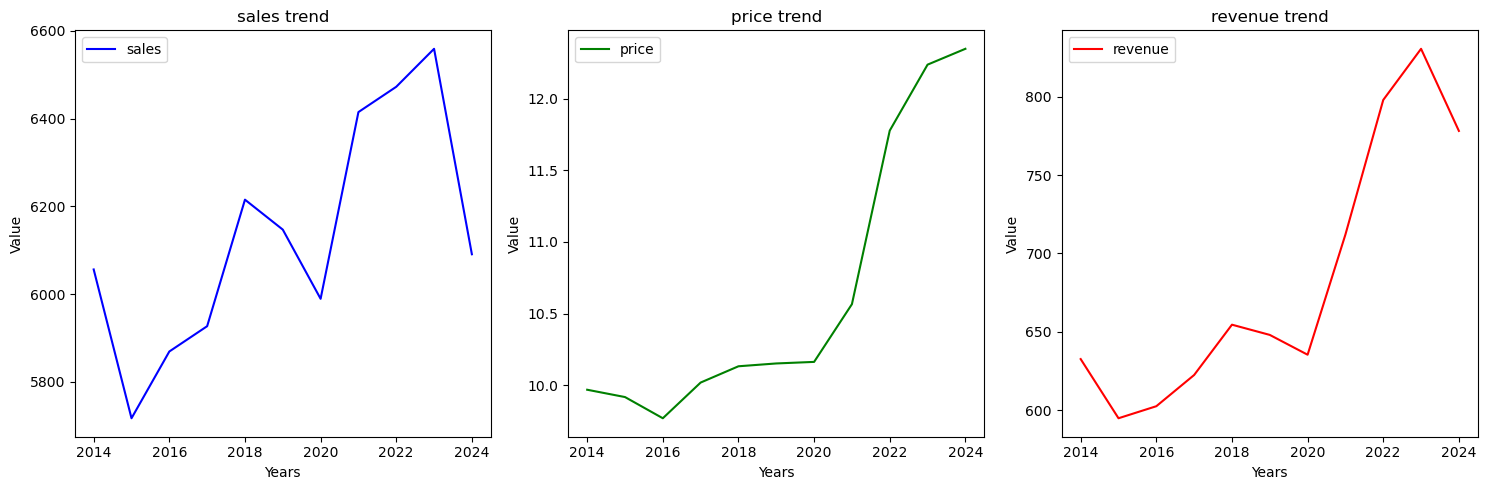

In [22]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Columns to plot
columns_to_plot = ['sales', 'price', 'revenue']

# Define a list of colors for the lines
colors = ['b', 'g', 'r']

# Plot each selected column with a different color in a separate subplot
for i, (column, color) in enumerate(zip(columns_to_plot, colors)):
    axes[i].plot(avg_year.index, avg_year[column], linestyle='-', label=column, color=color)
    axes[i].set_title(f'{column} trend')
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('Value')


# Add a legend to differentiate the lines
for ax in axes:
    ax.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Plot 6 - Distribution

Column: customers
Skew: 10.13


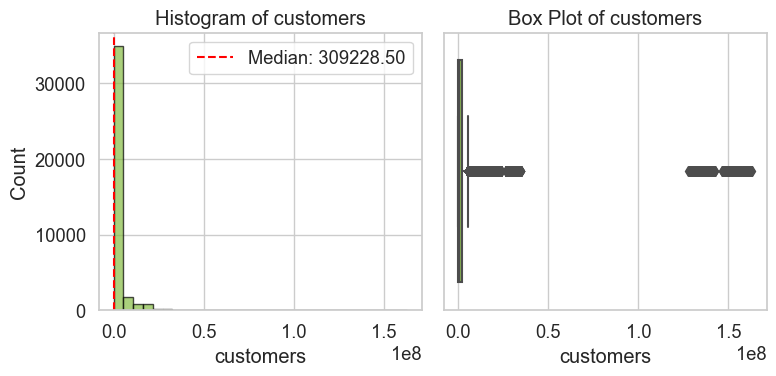

Column: price
Skew: 1.1


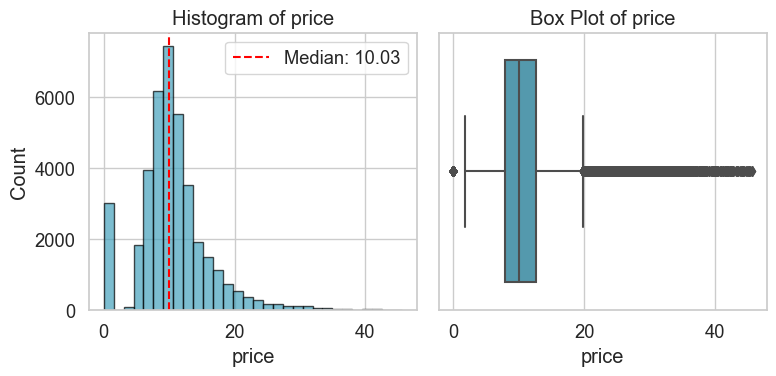

Column: revenue
Skew: 10.84


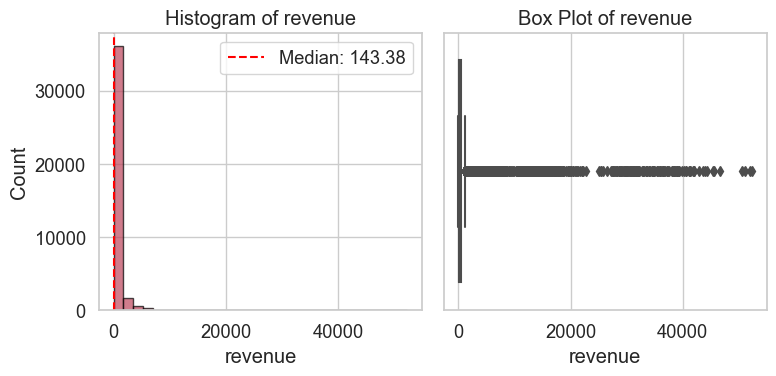

Column: sales
Skew: 10.67


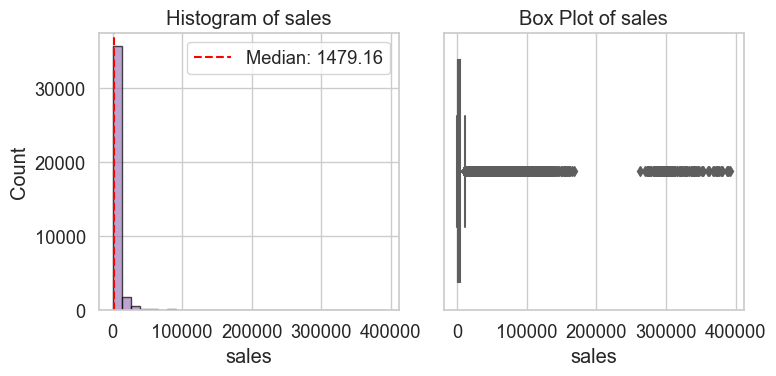

In [23]:
# List of numeric columns to plot
selected_cols = ["customers", "price", "revenue", "sales"]

# Define a list of colors for each column
colors = ["#87bc45", "#45a1bc", "#bc455c", "#a17dbc"]

sns.set(style="whitegrid", font_scale=1.2)

# Loop through the columns to create the plots
for i, col in enumerate(selected_cols):
    color = colors[i % len(colors)]  # Cycle through colors if more columns are added
    print(f"Column: {col}")
    print(f"Skew: {round(electricity_df[col].skew(), 2)}")  # Calculate skewness
    median_val = electricity_df[col].median()  # Calculate median
    
    plt.figure(figsize=(8, 4))  # Adjusted figure size
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(electricity_df[col], bins=30, color=color, alpha=0.7, edgecolor='black')  # Histogram with 30 bins
    plt.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}')  # Median line
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=electricity_df[col], color=color)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout() 
    plt.show()

#### Plot 7 - Correlation Heatmap of Customers, Price, Revenue, and Sales

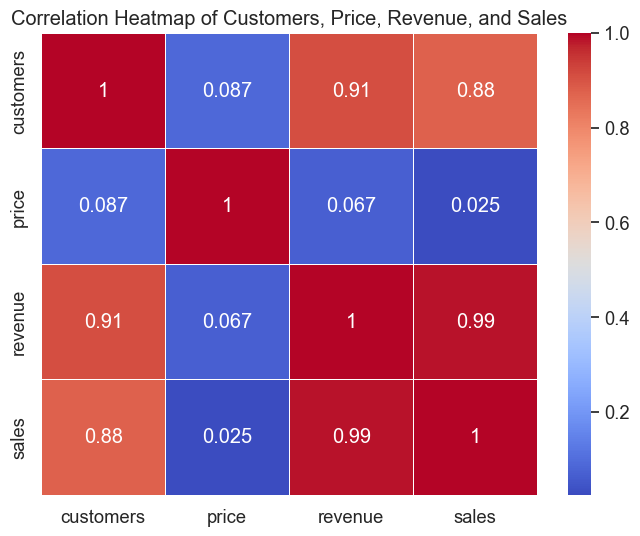

In [24]:
# Select relevant numeric columns for correlation
correlation_data = electricity_df[['customers', 'price', 'revenue', 'sales']].dropna()

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Customers, Price, Revenue, and Sales')
plt.show()


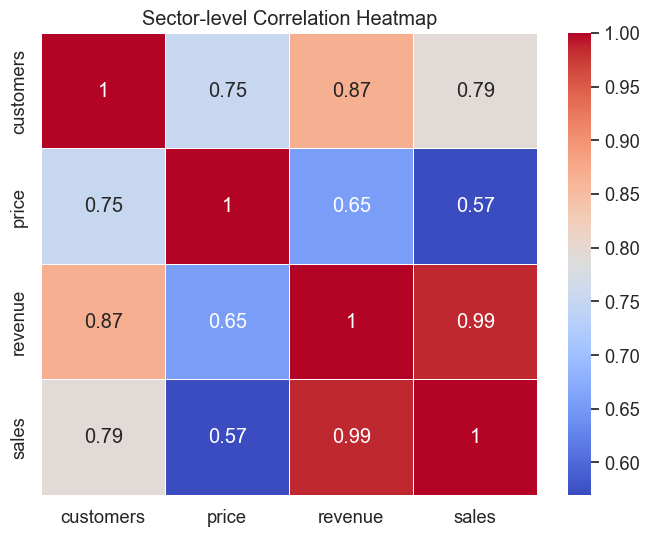

In [25]:
# Pivot the dataframe and calculate correlations by sector
sector_corr = electricity_df_cleaned.pivot_table(index='sectorName', values=['customers', 'price', 'revenue', 'sales'], aggfunc='mean').corr()

# Plot heatmap of the sector-level correlations
plt.figure(figsize=(8, 6))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sector-level Correlation Heatmap')
plt.show()

## Machine Learning

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

### Feature Engineering

In [27]:
electricity_df.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2024-06-01,MA,Massachusetts,IND,industrial,9850.0,18.05,87.30,483.74,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
1,2024-06-01,WI,Wisconsin,ALL,all sectors,3222461.0,13.06,771.66,5906.99,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
2,2024-06-01,WV,West Virginia,TRA,transportation,0.0,0.00,0.00,0.00,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
3,2024-06-01,WV,West Virginia,RES,residential,864734.0,15.48,128.27,828.48,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
5,2024-06-01,WV,West Virginia,IND,industrial,10953.0,7.84,95.10,1213.32,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [28]:
electricity_df.columns

Index(['period', 'stateid', 'stateDescription', 'sectorid', 'sectorName',
       'customers', 'price', 'revenue', 'sales', 'customers-units',
       'price-units', 'revenue-units', 'sales-units'],
      dtype='object')

In [29]:
ml_data = electricity_df.drop(['sales', 'revenue', 'sectorName','customers-units', 'price-units', 'revenue-units', 'sales-units'], axis=1)
ml_data.head()

,period,stateid,stateDescription,sectorid,customers,price
0,2024-06-01,MA,Massachusetts,IND,9850.0,18.05
1,2024-06-01,WI,Wisconsin,ALL,3222461.0,13.06
2,2024-06-01,WV,West Virginia,TRA,0.0,0.00
3,2024-06-01,WV,West Virginia,RES,864734.0,15.48
5,2024-06-01,WV,West Virginia,IND,10953.0,7.84


In [30]:
# Extract and sort unique state names for mapping
stateDescription_list = list(ml_data.stateDescription.value_counts().index.sort_values())

# Initialize a dictionary to map state names to numeric values
states_dict = {}

# Create a mapping for each state name to a unique numeric value
for index, element in enumerate(stateDescription_list):
    states_dict[element] = index

# Map state names to numeric values in a new column for model compatibility
ml_data['stateDescription_mapping'] = ml_data['stateDescription'].apply(lambda x: states_dict.get(x))

# Convert the categorical column 'sectorid' into dummy/one-hot encoded columns
ml_data = pd.get_dummies(ml_data, columns=['sectorid'])

# Extract year and month from the 'period' column for better feature representation
ml_data['Year'] = ml_data['period'].dt.year
ml_data['Month'] = ml_data['period'].dt.month

ml_data.head()

,period,stateid,stateDescription,customers,price,stateDescription_mapping,sectorid_ALL,sectorid_COM,sectorid_IND,sectorid_RES,sectorid_TRA,Year,Month
0,2024-06-01,MA,Massachusetts,9850.0,18.05,23,0,0,1,0,0,2024,6
1,2024-06-01,WI,Wisconsin,3222461.0,13.06,60,1,0,0,0,0,2024,6
2,2024-06-01,WV,West Virginia,0.0,0.00,59,0,0,0,0,1,2024,6
3,2024-06-01,WV,West Virginia,864734.0,15.48,59,0,0,0,1,0,2024,6
5,2024-06-01,WV,West Virginia,10953.0,7.84,59,0,0,1,0,0,2024,6


### Linear Regression - Predicting Price

In [31]:
# Defining the features and target variable
X = ml_data[['customers',
             'stateDescription_mapping', 'sectorid_ALL', 'sectorid_COM',
             'sectorid_IND', 'sectorid_RES', 'sectorid_TRA', 'Year', 'Month']]
y = ml_data['price']

# Splitting the dataset into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  # 20% for test
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 25% of 80% = 20% for validation

# Training the model on the training set
reg = LinearRegression().fit(X_train, y_train)

# Validating the model on the validation set
y_val_pred = reg.predict(X_val)

# Making predictions on the test set
y_test_pred = reg.predict(X_test)

#### Model Evaluation

In [32]:
# Combine actual and predicted values into a DataFrame for better visualization
lr_output = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred.round(2)})
print(lr_output.head(10))

# Calculate and print performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

   Actual  Predicted
0   12.29      13.42
1   10.56      11.46
2    9.07      11.86
3   10.61      15.20
4    0.00       7.21
5   10.67      11.70
6    9.37      12.39
7   32.39      14.86
8   18.87      14.56
9    5.92       5.75

Performance Metrics:
Mean Absolute Error (MAE): 3.45
Mean Squared Error (MSE): 22.45
Root Mean Squared Error (RMSE): 4.74
R-Squared (R2): 0.30


### Random Forest - Predicting Price

In [33]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = rf_model.predict(X_test)

#### Model Evaluation

In [34]:
# Combine actual and predicted values into a DataFrame for better visualization
rf_output = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred.round(2)})
print("Top 10 Results:")
print(rf_output.head(10))

mae_rf = mean_absolute_error(y_test, y_test_pred)
mse_rf = mean_squared_error(y_test, y_test_pred)
rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)
r2_rf = r2_score(y_test, y_test_pred)

print("\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-Squared (R2): {r2_rf:.2f}")

Top 10 Results:
   Actual  Predicted
0   12.29      11.71
1   10.56      10.61
2    9.07       8.59
3   10.61      11.50
4    0.00       0.00
5   10.67      10.43
6    9.37       9.39
7   32.39      32.14
8   18.87      17.57
9    5.92       6.87

Performance Metrics:
Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.51
Root Mean Squared Error (RMSE): 0.72
R-Squared (R2): 0.98


#### Cross-Validation to evaluate the performance of both the Linear Regression model and the Random Forest model

In [35]:
cv_r2_lr = cross_val_score(reg, X, y, cv=5, scoring='r2')
cv_r2_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print(f'Cross-Validation R2 Score for Linear Regression: {cv_r2_lr.mean():.4f}')
print(f'Cross-Validation R2 Score for Random Forest: {cv_r2_rf.mean():.4f}')

Cross-Validation R2 Score for Linear Regression: 0.2721
Cross-Validation R2 Score for Random Forest: 0.9386


**This indicates that the Random Forest model generalizes better to unseen data compared to the Linear Regression model.** <br> 
The Linear Regression model explains only 27.21% of the variance in the target variable.
The Random Forest model explains 93.86% of the variance in the target variable.

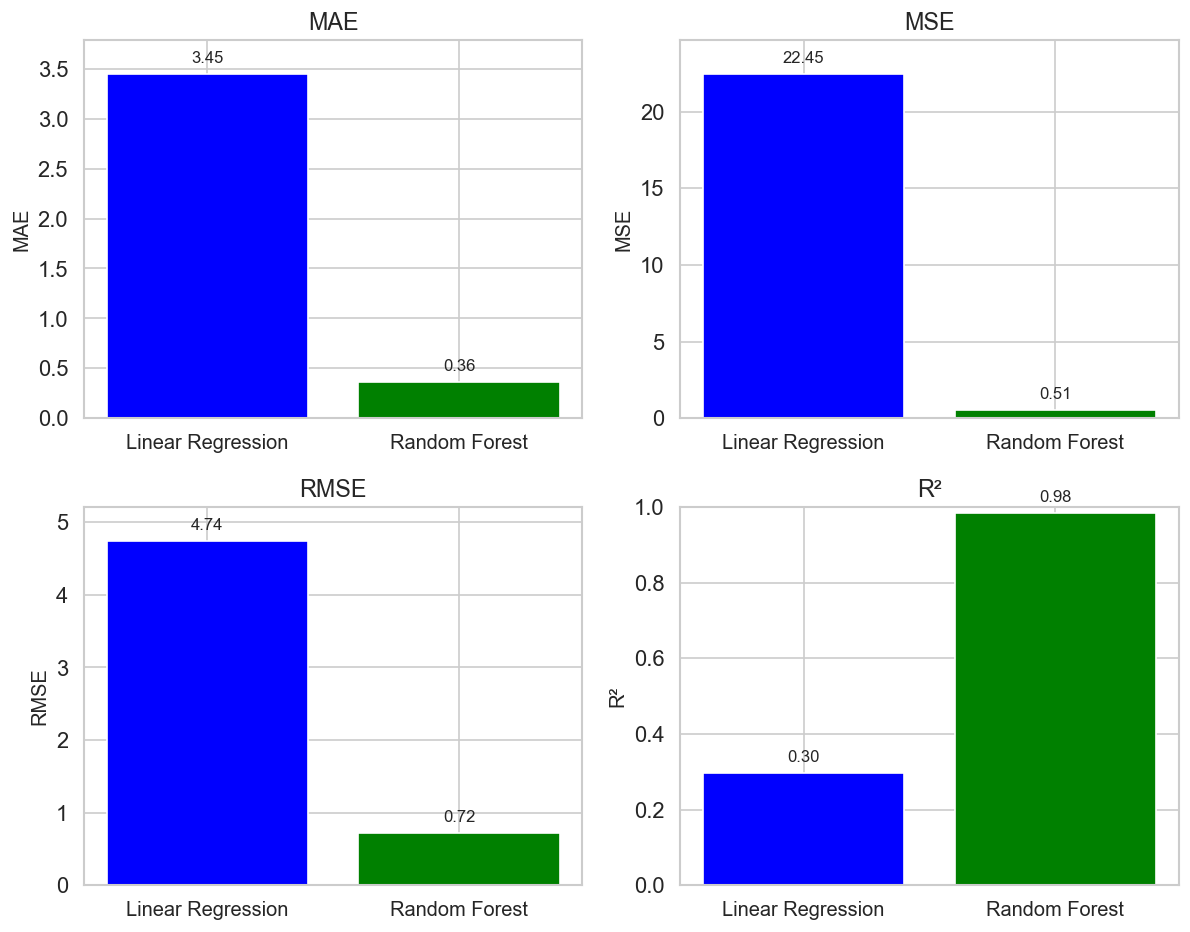

In [52]:
# Lists of metrics
metrics_lr = [mae, mse, rmse, r2]
metrics_rf = [mae_rf, mse_rf, rmse_rf, r2_rf]
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Plot each metric in a subplot
for idx, ax in enumerate(axes):
    # Data for current metric
    metric_lr = metrics_lr[idx]
    metric_rf = metrics_rf[idx]
    metric_name = metrics_names[idx]
    
    # Bar positions and labels
    x = np.arange(2)
    values = [metric_lr, metric_rf]
    labels = ['Linear Regression', 'Random Forest']
    colors = ['blue', 'green']
    
    # Create bar chart
    bars = ax.bar(x, values, color=colors)
    
    # Add numerical values on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset text vertically
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    # Set titles and labels
    ax.set_title(f'{metric_name}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    
    # Adjust y-axis limits for better visualization
    if metric_name == 'R²':
        ax.set_ylim(0, 1)  # R² ranges from 0 to 1
    else:
        # Add 10% margin to the y-axis limit
        max_value = max(values)
        ax.set_ylim(0, max_value * 1.1)
    
    # Enable grid
    ax.yaxis.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


### Feature Importance: Identifying Key Features in Random Forest Predictions


Feature Importance:
                    Feature  Importance
0                 customers    0.484677
1  stateDescription_mapping    0.345849
5              sectorid_RES    0.075946
7                      Year    0.041602
4              sectorid_IND    0.036692
8                     Month    0.009999
6              sectorid_TRA    0.003223
2              sectorid_ALL    0.001010
3              sectorid_COM    0.001001


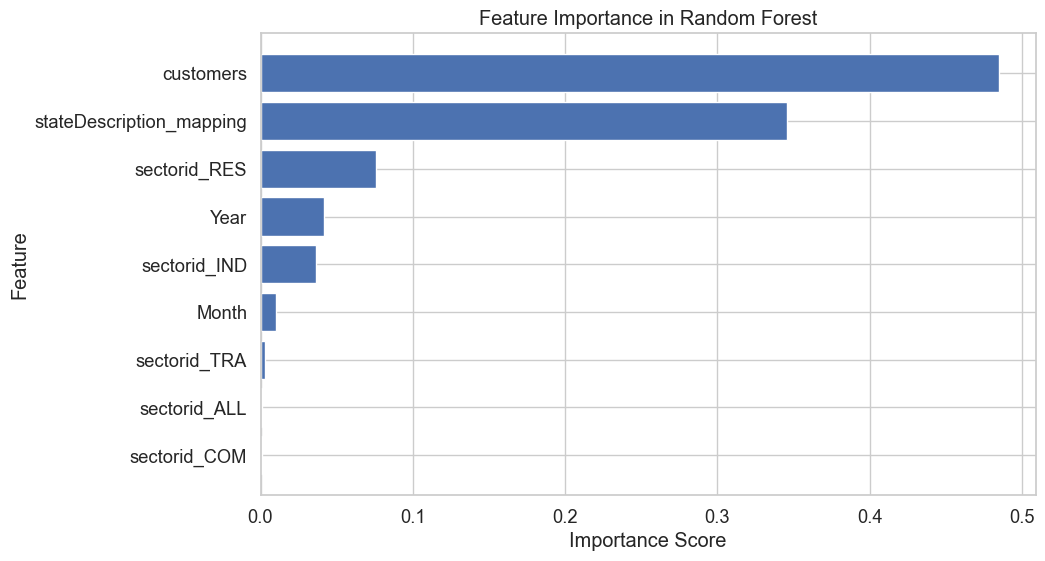

In [36]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_names = X.columns  # Features used in the model
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

**Top Features:** <br>
**customers (0.4847):** This is the most important feature, contributing nearly 48.5% to the model’s predictive power. It suggests that the number of customers is strongly correlated with the target variable (price).<br>
**stateDescription_mapping (0.3458):** This feature contributes 34.6%, indicating that the state where the data is collected significantly influences the target variable. It might capture regional variations in pricing patterns.<br>

**Moderately Important Features:**<br>
**sectorid_RES (0.0759):** Residential sector usage contributes about 7.6%, showing its relevance but to a lesser extent compared to the top features.<br>
**Year (0.0416):** Temporal trends, represented by the year, contribute about 4.2%, suggesting that pricing changes over time play a minor but notable role.<br>

**Least Important Features:**<br>
sectorid_IND (0.0367) and Month (0.0100): Industrial sector and monthly seasonality have small influences, contributing around 3.7% and 1%, respectively.<br>
Other Sectors (sectorid_TRA, sectorid_ALL, sectorid_COM): These sectors contribute minimally, with combined importance of less than 1%. They likely have limited variability or impact on the target variable.<br>

## ⚠️ STOP HERE ⚠️
The rest of the notebook just for experimenting. It is not necessary to run beyond this point.

#### Time Series Forecasting - Forecasting the number of customers

In [37]:
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

In [38]:
grouped_df = electricity_df.groupby(['stateDescription', 'sectorid', 'period']).mean()

sdf = grouped_df.reset_index().set_index(['stateDescription', 'sectorid', 'period'])

time_series = sdf.loc[('Hawaii', 'RES'), 'customers'] # Extract the time series data for the selected state and sector

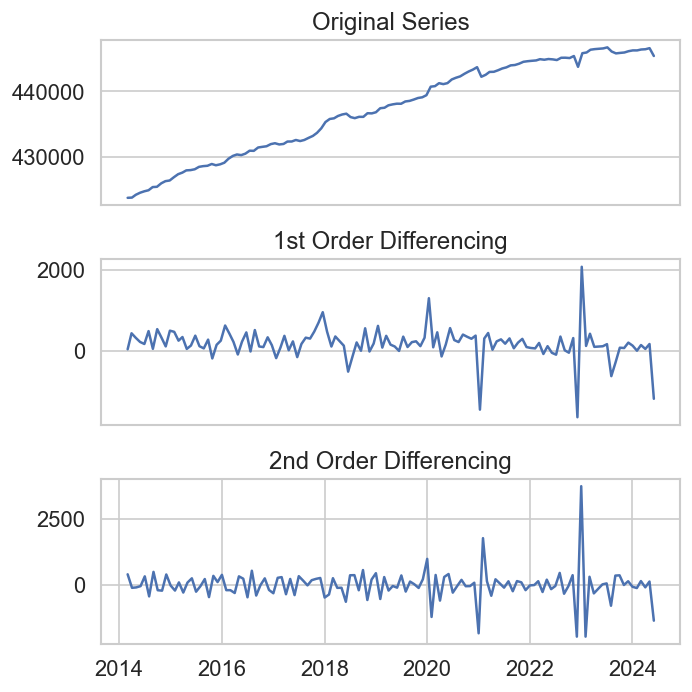

In [39]:
# Plot Original and Differenced Series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 6))
ax1.plot(time_series)
ax1.set_title('Original Series')
ax1.xaxis.set_visible(False)

ax2.plot(time_series.diff())
ax2.set_title('1st Order Differencing')
ax2.xaxis.set_visible(False)

ax3.plot(time_series.diff().diff())
ax3.set_title('2nd Order Differencing')

plt.tight_layout()
plt.show()

C:\Users\Tiffa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


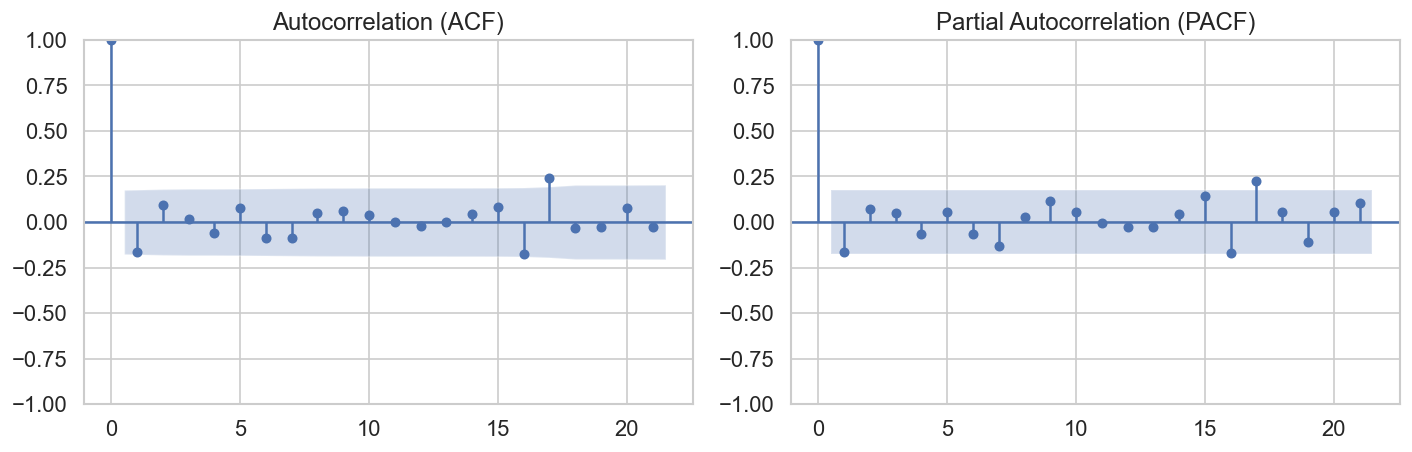

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot ACF on the first subplot
plot_acf(time_series.diff().dropna(), ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# Plot PACF on the second subplot
plot_pacf(time_series.diff().dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()

In [41]:
# Perform Augmented Dickey-Fuller Test
adf_test = adfuller(time_series.dropna())
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

ADF Statistic: -2.610019942170087
p-value: 0.09094398245950291


In [42]:
# Fit ARIMA Model
model = ARIMA(time_series, order=(4, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Tiffa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tiffa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tiffa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tiffa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:              customers   No. Observations:                  125
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -914.033
Date:                Tue, 03 Dec 2024   AIC                           1842.067
Time:                        15:51:31   BIC                           1861.809
Sample:                             0   HQIC                          1850.086
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0457      0.544      0.084      0.933      -1.021       1.112
ar.L2          0.9323      0.541      1.722      0.085      -0.129       1.993
ar.L3          0.0040      0.044      0.092      0.9

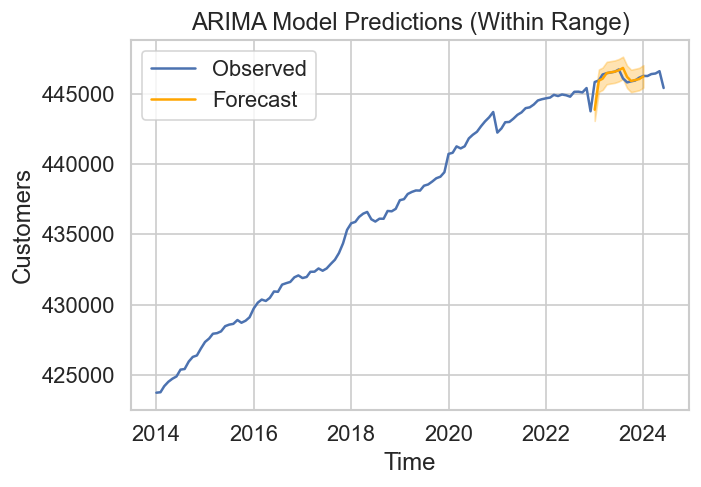

In [43]:
start_index = '2023-01-01'
end_index = '2024-01-01'
forecast = model_fit.get_prediction(start=start_index, end=end_index)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(6, 4))
plt.plot(time_series, label="Observed")
plt.plot(predicted_mean.index, predicted_mean, label="Forecast", color='orange')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('ARIMA Model Predictions (Within Range)')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.show()

C:\Users\Tiffa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


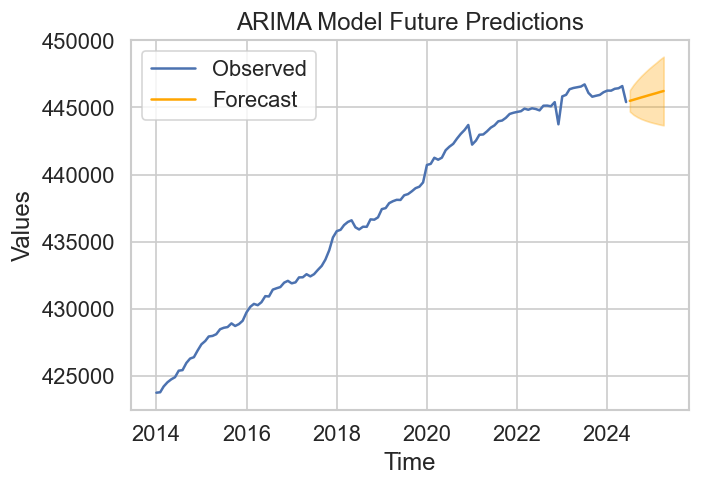

In [44]:
steps_ahead = 10
future_forecast = model_fit.get_forecast(steps=steps_ahead)
future_index = pd.date_range(start=time_series.index[-1], periods=steps_ahead + 1, freq='MS')[1:]
predicted_mean = future_forecast.predicted_mean
conf_int = future_forecast.conf_int()

plt.figure(figsize=(6, 4))
plt.plot(time_series, label="Observed")
plt.plot(future_index, predicted_mean, label="Forecast", color='orange')
plt.fill_between(future_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('ARIMA Model Future Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
